### This notebook demonstrate a simple application of XGCM's Transform fuctionality for plotting POP2 variable (e.g. O$_2$) on density surfaces
##### Read-the-docs: https://xgcm.readthedocs.io/en/latest/transform.html#

---
### Import packages

In [6]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pop_tools import get_grid
import pop_tools

In [43]:
import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client

cluster = PBSCluster(cores=3,
                     memory='109G', 
                    processes=10,
                    walltime="00:10:00",
                    queue='casper', 
                    local_directory='/glade/scratch/yeddebba/tmp', 
                    project='USIO0015', #'PROJECT_CODE'
                    interface='ib0', 
                    )
cluster.scale(10)
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})
client = Client(cluster)

/glade/work/yeddebba/miniconda3/envs/O2_mesoscale/lib/python3.6/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43460 instead
  http_address["port"], self.http_server.port


In [45]:
client

Client Scheduler: tcp://10.12.206.47:33038 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/yeddebba/proxy/43460/status,Cluster Workers: 10 Cores: 30 Memory: 109.00 GB


In [46]:
file1 = f'/glade/campaign/cesm/collections/cesmLE/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/O2/b.e11.B20TRC5CNBDRD.f09_g16.002.pop.h.O2.192001-200512.nc'
file2 = f'/glade/campaign/cesm/collections/cesmLE/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/PD/b.e11.B20TRC5CNBDRD.f09_g16.002.pop.h.PD.192001-200512.nc'

In [59]:
dso = xr.open_mfdataset({file1}).sel(time='2000-01-01').squeeze()
dso

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    time                  object 2000-01-01 00:00:00
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ANGLET                (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXT                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXU                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DYT                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DYU                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                    ...
    sound                 float64 ...
    stefan_boltzmann      float64 ...
    time_bound            (d2) object dask.array<chunksize=(2,), meta=np.ndarray>
    transport_components  (transport_comp) |S256 dask.array<chunksize=(5,), meta=np.ndarray>
    transport_regions     (transport_reg) |S256 dask.array<chunksize=(2,), meta=np.ndarray>
    vonkar                float64 ...
Attributes: (12/14)
    title:                     b.e11.B20TRC5CNBDRD.f09_g16.002
    history:                   Tue Sep 10 00:22:02 2013: /glade/apps/opt/nco/...
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy...
    ...                        ...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [60]:
dsp = xr.open_mfdataset({file2}).sel(time='2000-01-01').squeeze()
dsp

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    time                  object 2000-01-01 00:00:00
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ANGLET                (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXT                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXU                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DYT                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DYU                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                    ...
    sound                 float64 ...
    stefan_boltzmann      float64 ...
    time_bound            (d2) object dask.array<chunksize=(2,), meta=np.ndarray>
    transport_components  (transport_comp) |S256 dask.array<chunksize=(5,), meta=np.ndarray>
    transport_regions     (transport_reg) |S256 dask.array<chunksize=(2,), meta=np.ndarray>
    vonkar                float64 ...
Attributes: (12/14)
    title:                     b.e11.B20TRC5CNBDRD.f09_g16.002
    history:                   Tue Sep 10 01:10:03 2013: /glade/apps/opt/nco/...
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy...
    ...                        ...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [61]:
rho=np.linspace(1.022,1.027,21)
rho

array([1.022  , 1.02225, 1.0225 , 1.02275, 1.023  , 1.02325, 1.0235 ,
       1.02375, 1.024  , 1.02425, 1.0245 , 1.02475, 1.025  , 1.02525,
       1.0255 , 1.02575, 1.026  , 1.02625, 1.0265 , 1.02675, 1.027  ])

In [62]:
%%time
gridx, dsx = pop_tools.to_xgcm_grid_dataset(dso, periodic=False)
O2_rho= gridx.transform(dso.O2, 'Z', rho, target_data=dsp.PD,method='linear')
O2_rho

CPU times: user 235 ms, sys: 12.7 ms, total: 247 ms
Wall time: 445 ms


<xarray.DataArray 'O2' (nlat: 384, nlon: 320, PD: 21)>
dask.array<transpose, shape=(384, 320, 21), dtype=float64, chunksize=(384, 320, 21), chunktype=numpy.ndarray>
Coordinates:
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    time     object 2000-01-01 00:00:00
  * PD       (PD) float64 1.022 1.022 1.022 1.023 ... 1.026 1.026 1.027 1.027
Dimensions without coordinates: nlat, nlon

CPU times: user 385 ms, sys: 35.4 ms, total: 421 ms
Wall time: 5.72 s


Text(0.5, 1.0, 'O$_2$ on $\\sigma_{\theta}$=26.5 (mmol.m$^{-3}$)')

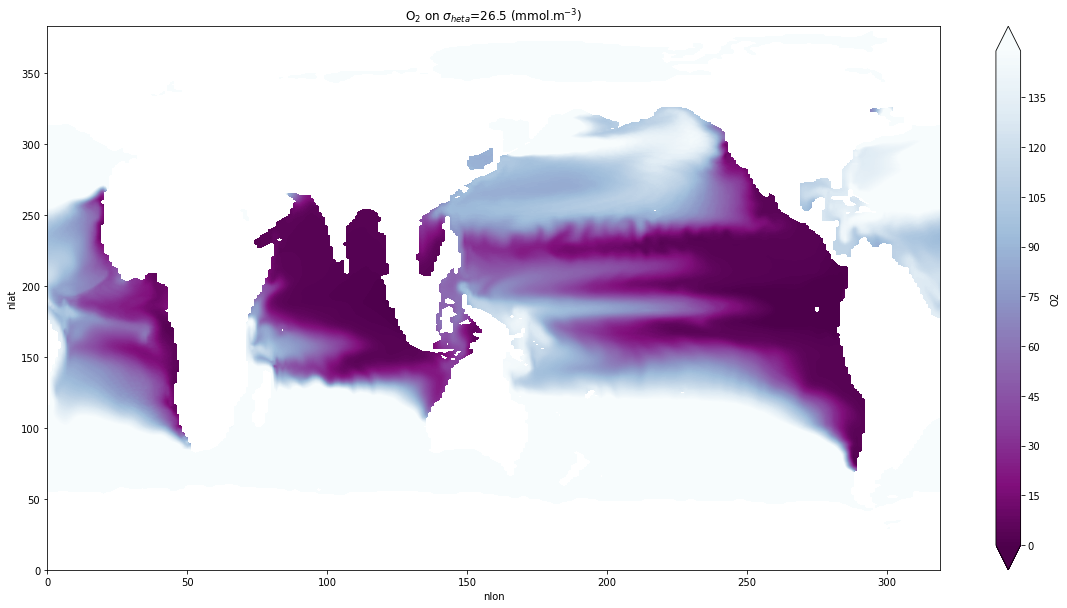

In [63]:
%%time
O2_rho.sel(PD=1.0265).plot.contourf(figsize=(20,10),cmap='BuPu_r',levels=np.arange(0,150,1))

plt.title('O$_2$ on $\sigma_{\theta}$=26.5 (mmol.m$^{-3}$)')